In [142]:
import numpy as np
import pandas as pd

In [143]:
df = pd.read_csv("./laptops.csv")


In [144]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [145]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [146]:
df_new = df[['ram','storage','screen','final_price']]
df_new.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='final_price', ylabel='Count'>

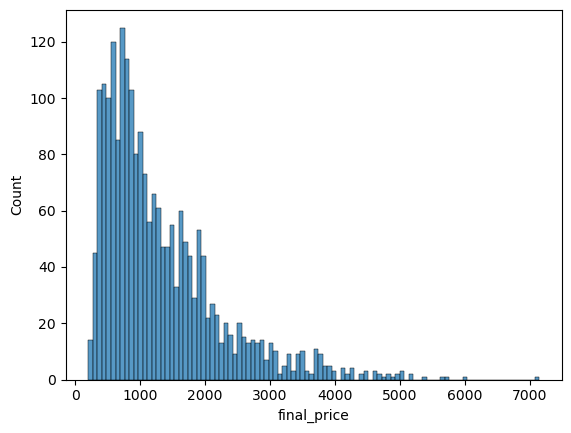

In [148]:
sns.histplot(df_new.final_price,  bins=100)

# Question 1

In [149]:
df_new.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [150]:
df_new.ram.median()

16.0

## Split dataset

In [151]:
def split_data(df):
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train= n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df_new.iloc[idx[:n_train]]
    df_val = df_new.iloc[idx[n_train:n_train + n_val]]
    df_test = df_new.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    return df_train, df_val, df_test

In [152]:
def y_vectors(df_train, df_val, df_test):
    
    y_train = (df_train.final_price.values)
    y_test = (df_test.final_price.values)
    y_val = (df_val.final_price.values)

    y_train_log = np.log1p(df_train.final_price.values)
    y_test_log = np.log1p(df_test.final_price.values)
    y_val_log = np.log1p(df_val.final_price.values)

    del df_train['final_price']
    del df_test['final_price']
    del df_val['final_price']

    return y_train, y_test, y_val, y_train_log, y_test_log, y_val_log

In [153]:
np.random.seed(42)

In [154]:
df_train, df_val, df_test = split_data(df_new)

In [155]:
y_train, y_test, y_val, y_train_log, y_test_log, y_val_log = y_vectors(df_train, df_val, df_test)

# Question 3

In [156]:
def train_linear_reg(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = np.dot(X.T,X)
    inv = np.linalg.inv(XTX)
    w = np.linalg.multi_dot([inv,X.T,y])
    
    return w[0], w[1:]

In [157]:
def prepare_X(df, value):
    
    #Faire une copie utilisée dans la fct pour pas que données originales soient modifiées
    df = df.copy() 
    df['screen'] = df['screen'].fillna(value)
    X = df.values
    
    return X

In [158]:
def rmse(y,y_pred):
    error = (y-y_pred)**2
    mse = error.mean()
    return np.sqrt(mse)

## Replace missing values by 0 and training model

In [159]:
X_train = prepare_X(df_train, 0)

In [76]:
w0, w = train_linear_reg(X_train, y_train)
w0, w

(676.8954853003961, array([ 43.70681555,   0.86506867, -36.10399833]))

In [160]:
w0_log, w_log = train_linear_reg(X_train, y_train_log)
w0_log, w_log

(6.727163706112719, array([ 0.02630589,  0.00066041, -0.03651909]))

In [161]:
y_pred = w0 + np.dot(X_train, w)
y_pred

array([2353.34323589,  379.22889194, 2415.32855242, ..., 1234.59599817,
       1296.5813147 , 1296.5813147 ])

In [162]:
y_pred_log = w0_log + np.dot(X_train, w_log)
y_pred_log

array([7.65966079, 6.35973416, 7.71809133, ..., 6.91648826, 6.9749188 ,
       6.9749188 ])

<Axes: ylabel='Count'>

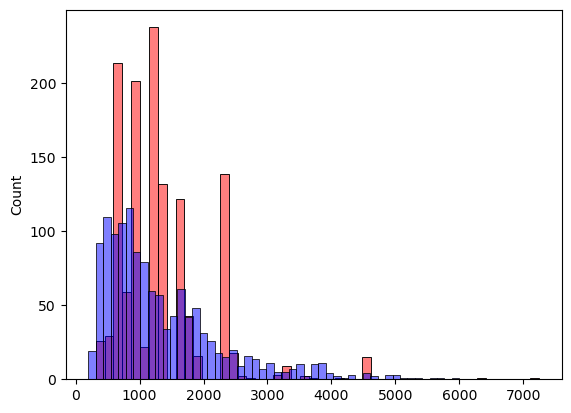

In [163]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Replace missing values by mean and training model

In [164]:
moy = df_train.screen.mean()

In [165]:
X_train = prepare_X(df_train, moy)

In [166]:
w0, w = train_linear_reg(X_train, y_train)
w0, w

(808.915990733396, array([ 43.90774584,   0.87135236, -45.18273312]))

In [167]:
w0_log, w_log = train_linear_reg(X_train, y_train_log)
w0_log, w_log

(6.85556654413449, array([ 0.02650252,  0.00066643, -0.04534341]))

In [168]:
y_pred = w0 + np.dot(X_train, w)
y_pred

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

In [169]:
y_pred_log = w0_log + np.dot(X_train, w_log)
y_pred_log

array([7.662716  , 6.36488586, 7.73526545, ..., 6.91345982, 6.98600927,
       6.98600927])

<Axes: ylabel='Count'>

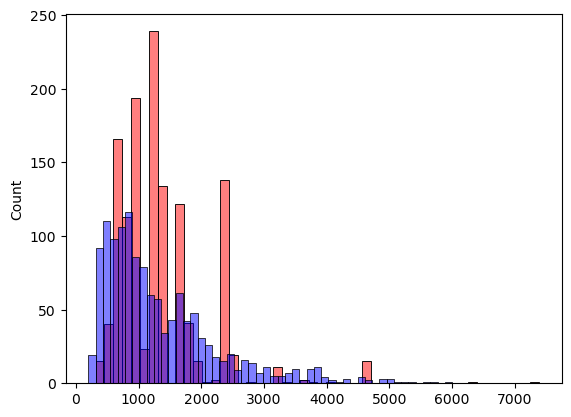

In [170]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Validation and RMSE computation

In [172]:
X_val = prepare_X(df_val, 0)
w0, w = train_linear_reg(X_val, y_val)
y_pred_val = w0 + np.dot(X_val, w)
score = rmse(y_pred_val,y_val)
print(round(score, 2))

X_val = prepare_X(df_val, 0)
w0_log, w_log = train_linear_reg(X_val, y_val_log)
y_pred_val_log = w0_log + np.dot(X_val, w_log)
score = rmse(y_pred_val_log,y_val_log)
print(round(score, 2))



589.28
0.42


In [174]:
X_val = prepare_X(df_val, moy)
w0, w = train_linear_reg(X_val, y_val)
y_pred_val = w0 + np.dot(X_val, w)
score = rmse(y_pred_val,y_val)
print(round(score,2))

X_val = prepare_X(df_val, 0)
w0_log, w_log = train_linear_reg(X_val, y_val_log)
y_pred_val_log = w0_log + np.dot(X_val, w_log)
score = rmse(y_pred_val_log,y_val_log)
print(round(score, 2))

590.65
0.42


# Question 4

In [175]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [178]:
X_train = prepare_X(df_train, 0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    w0_log, w_log = train_linear_regression_reg(X_train, y_train_log, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    y_pred_log = w0_log + X_val.dot(w_log)
    score_log = rmse(y_val_log, y_pred_log)  
    
    print(r, "     ", round(score,2),"     ", round(score_log,2))

0       597.36       0.43
0.01       597.36       0.43
0.1       597.35       0.43
1       597.21       0.43
5       597.01       0.46
10       597.06       0.51
100       597.9       0.67


# Question 5

In [180]:
scores = []
for value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:  

    np.random.seed(value)

    df_train, df_val, df_test = split_data(df_new)
    y_train, y_test, y_val,y_train_log, y_test_log, y_val_log = y_vectors(df_train, df_val, df_test)    
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_reg(X_train, y_train)
    w0, w
    y_pred = w0 + np.dot(X_train, w)
    y_pred

    X_val = prepare_X(df_val, 0)
    w0, w = train_linear_reg(X_val, y_val)
    y_pred_val = w0 + np.dot(X_val, w)
    score = rmse(y_pred_val,y_val)
    scores.append(score)

    print(value, score)

0 562.3633743953562
1 635.1034339888065
2 587.6817062431007
3 590.778894052774
4 562.9603400217825
5 562.7090932685971
6 627.1784889470537
7 542.7178839838225
8 581.4553067752282
9 549.2818205242651


In [181]:
np.std(scores)

29.449873777491646

In [92]:
#df_describe = pd.DataFrame(scores)
#df_describe.describe()

# Question 6

In [182]:
np.random.seed(9)

df_train, df_val, df_test = split_data(df_new)
y_train, y_test, y_val,y_train_log, y_test_log, y_val_log = y_vectors(df_train, df_val, df_test)    

    

In [183]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train,0)
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [184]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [185]:
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049559